In [1]:
####importing Required Packages####

import numpy as np # For linear algebra
import pandas as pd #For data processing
import matplotlib.pyplot as plt  # For data visualization
import re # For Regular Expression
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)


In [2]:
!pip install pyspark

In [3]:
pd.set_option('display.max_rows', None) # Diplay max rows in notebook
pd.set_option('display.max_columns', None) # Diplay max rows in notebook

## Importing Train Dataset


In [4]:
#importing data
train = pd.read_csv("C://Users//diksh//OneDrive//Desktop//DATA SCIENCE//DATA-603//Project//train.csv", low_memory=False) 
train.columns = ['sentiment', 'title','text']
train.head()


,sentiment,title,text
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [5]:
train.shape

(3599999, 3)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599999 entries, 0 to 3599998
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   sentiment  int64 
 1   title      object
 2   text       object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


In [7]:
train.describe()

,sentiment
count,3599999.0
mean,1.5
std,0.5
min,1.0
25%,1.0
50%,1.0
75%,2.0
max,2.0


In [8]:
train.isna().sum()

sentiment     0
title        77
text          0
dtype: int64

## Importing Test Dataset

In [9]:
test=pd.read_csv("C://Users//diksh//OneDrive//Desktop//DATA SCIENCE//DATA-603//Project//test.csv", low_memory=False) 
test.columns = ['sentiment', 'title','text']
test.head()

,sentiment,title,text
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...


In [10]:
test=test[['sentiment','text']]
test.head()

,sentiment,text
0,2,Despite the fact that I have only played a sma...
1,1,I bought this charger in Jul 2003 and it worke...
2,2,Check out Maha Energy's website. Their Powerex...
3,2,Reviewed quite a bit of the combo players and ...
4,1,I also began having the incorrect disc problem...


In [11]:
train.shape,test.shape

((3599999, 3), (399999, 2))

In [12]:
train['sentiment'].unique()

array([2, 1], dtype=int64)

In [13]:
test['sentiment'].unique()

array([2, 1], dtype=int64)

In [14]:
train.sentiment.value_counts()

1    1800000
2    1799999
Name: sentiment, dtype: int64

### Dataset consists of equal number of 1's and 2's 

In [15]:
test.sentiment.value_counts()

1    200000
2    199999
Name: sentiment, dtype: int64

In [16]:
train['encoded_cat'] = train['sentiment'].astype('category').cat.codes
train.head()

,sentiment,title,text,encoded_cat
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,1
1,2,Amazing!,This soundtrack is my favorite music of all ti...,1
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,1
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",1
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...,1


In [17]:
train.encoded_cat.value_counts()

0    1800000
1    1799999
Name: encoded_cat, dtype: int64

In [18]:
test['encoded_cat'] = test['sentiment'].astype('category').cat.codes
test.encoded_cat.value_counts()

0    200000
1    199999
Name: encoded_cat, dtype: int64

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399999 entries, 0 to 399998
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   sentiment    399999 non-null  int64 
 1   text         399999 non-null  object
 2   encoded_cat  399999 non-null  int8  
dtypes: int64(1), int8(1), object(1)
memory usage: 6.5+ MB


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599999 entries, 0 to 3599998
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   sentiment    int64 
 1   title        object
 2   text         object
 3   encoded_cat  int8  
dtypes: int64(1), int8(1), object(2)
memory usage: 85.8+ MB


In [21]:
X_train=list(train['text'])
X_train[:5]

["I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.",
 'This soundtrack is my favorite music of all time, hands down. The intense sadness of "Prisoners of Fate" (which means all the more if you\'ve played the game) and the hope in "A Distant Promise" and "Girl who Stole the Star" have been an important inspiration to me personally throughout my teen years. The higher energy tracks like "Chrono Cross ~ Time\'s Scar~", "Time of the Dreamwatch", and "Chronomantique" (indefinably remeniscent of Chrono Trigger) are all absolutely superb as well.This soundtrack is amazing music,

In [22]:
X_test=list(test['text'])
X_test[:5]

["Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there's not too many of those kinds of songs in my other video game soundtracks. I must admit that one of the songs (Life-A Distant Promise) has brought tears to my eyes on many occasions.My one complaint about this soundtrack is that they use guitar fretting effects in many of the songs, which I find distracting. But even if those weren't included I would still consider the collection worth it.",
 'I bought this charger in Jul 2003 and it worked OK for a while. The design is nice and convenient. However, after about a year, the batteries would not hold a charge. Might as well just get alkaline disposables, or look elsewhere for a charger that co

In [23]:
y_train=list(train['encoded_cat'])
y_train[:5]

[1, 1, 1, 1, 1]

In [24]:
y_test=list(test['encoded_cat'])
y_test[:5]

[1, 0, 1, 1, 0]

In [25]:
round(train['sentiment'].value_counts()*100/len(train),2)

1    50.0
2    50.0
Name: sentiment, dtype: float64

In [26]:
round(test['sentiment'].value_counts()*100/len(test),2)

1    50.0
2    50.0
Name: sentiment, dtype: float64

In [27]:
!pip install transformers

In [28]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [29]:
len(X_train)

3599999

In [30]:
len(X_test)

399999

In [31]:
X_train = X_train[1:10000]

In [32]:
X_test = X_test[1:1000]

In [33]:
train_enc = tokenizer(X_train, truncation=True, padding=True)
test_enc = tokenizer(X_test, truncation=True, padding=True)

In [34]:
! pip install tensorflow

In [35]:
y_train = y_train[1:10000]
y_test = y_test[1:1000]

In [36]:
import tensorflow as tf

train_ds = tf.data.Dataset.from_tensor_slices((
    dict(train_enc),
    y_train
))

test_ds = tf.data.Dataset.from_tensor_slices((
    dict(test_enc),
    y_test
))

In [37]:
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments

training_args = TFTrainingArguments(
    output_dir='./results',          
    num_train_epochs=2,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,   
    warmup_steps=500,                
    weight_decay=0.1,               
    logging_steps=100,
    
)

In [38]:
! pip install wandb --upgrade

In [39]:
! pip install wordcloud

In [40]:
test1 = test.head(1000)

## word cloud generated based on customer satisfaction (reviews)

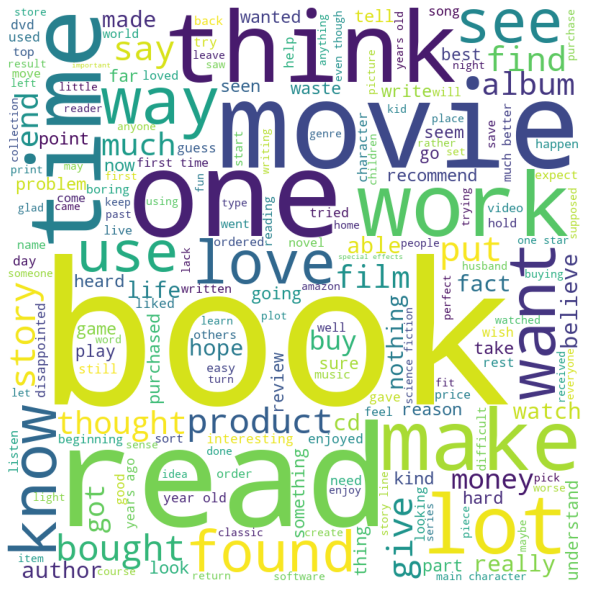

In [41]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in test1.text:

    # typecaste each val to string
    val = str(val)

# split the value
    tokens = val.split()
# Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


## Word Cloud generation for customer opinions on products

In [42]:
data=pd.read_csv("C://Users//diksh//OneDrive//Desktop//DATA SCIENCE//DATA-603//Project//DatafinitiElectronicsProductData.csv", low_memory=False) 

data.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,keys,manufacturer,manufacturerNumber,name,primaryCategories,reviews.date,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-01T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-11-28T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds


In [43]:
data.rename(columns={'reviews.text': 'reviews_text'}, inplace=True)

In [44]:
data1 = data.head(1000)

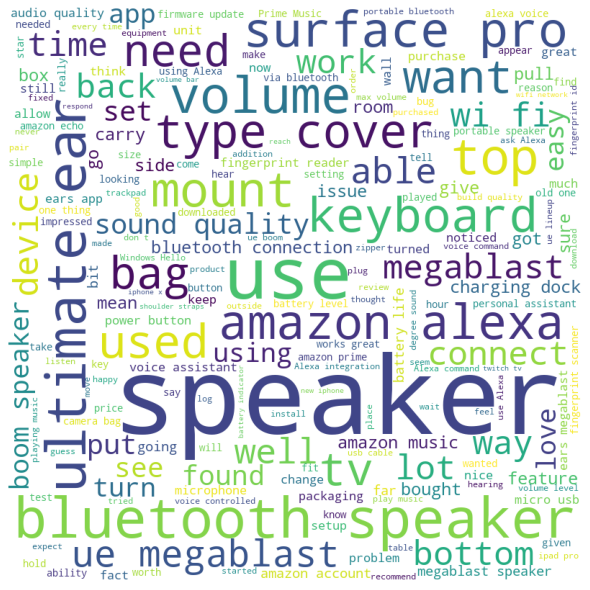

In [45]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data1.reviews_text:

    # typecast each val to string
    val = str(val)

# split the value
    tokens = val.split()
# Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


## Word cloud generated based on customer questions and answers

In [46]:
amazon_ds=pd.read_csv("C://Users//diksh//OneDrive//Desktop//DATA SCIENCE//DATA-603//Project/Amazon_Products.csv", low_memory=False) 

amazon_ds.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260,Unnamed: 261,Unnamed: 262,Unnamed: 263,Unnamed: 264,Unnamed: 265,Unnamed: 266,Unnamed: 267,Unnamed: 268,Unnamed: 269,Unnamed: 270,Unnamed: 271,Unnamed: 272,Unnamed: 273,Unnamed: 274,Unnamed: 275,Unnamed: 276,Unnamed: 277,Unnamed: 278,Unnamed: 279,Unnamed: 280,Unnamed: 281,Unnamed: 282,Unnamed: 283,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287,Unnamed: 288,Unnamed: 289,Unnamed: 290,Unnamed: 291,Unnamed: 292,Unnamed: 293,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 298,Unnamed: 299,Unnamed: 300,Unnamed: 301,Unnamed: 302,Unnamed: 303,Unnamed: 304,Unnamed

In [47]:
amazon_ds1 = amazon_ds.head(1000)

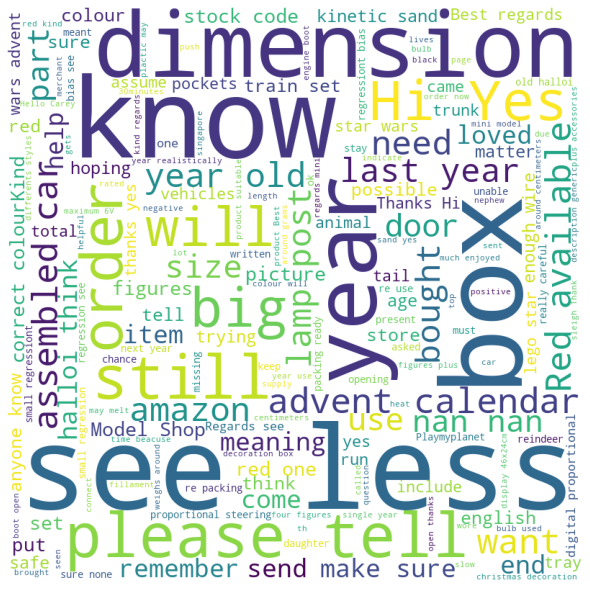

In [48]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in amazon_ds1.customer_questions_and_answers:

    # typecaste each val to string
    val = str(val)

# split the value
    tokens = val.split()
# Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


Overall, the word clouds are generated to analyze the customer satisfaction, opinion and most asked questions in Amazon website

## References:

https://www.kaggle.com/datasets/bittlingmayer/amazonreviews

https://www.kaggle.com/code/gauravduttakiit/sentiment-analysis-using-hugging-face/notebook

https://www.geeksforgeeks.org/generating-word-cloud-python/

